# import libraries

In [1]:
#import libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import evaluation metric libraries
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# Library used for data preprocessing
from sklearn.preprocessing import LabelEncoder

# Import model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold

# Library used for ML Model implementation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Loading Data

In [2]:
df=pd.read_csv(r'files/iris.csv')

# 1.Data handling

# dataset top 5 rows views

In [3]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Dataset Rows & columns count

In [4]:
print("Number of rows are : ",  df.shape[0])
print("Number of columns are : ", df.shape[1])

Number of rows are :  150
Number of columns are :  5


# Dataset Information

In [5]:
#checking dataset using info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# checking duplicates

In [7]:
#dataset duplicates value Count
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 3


# removing duplicates

In [8]:
#removing duplicates
new_df=df.drop_duplicates()

In [9]:
#rows and columns after removing duplicates
new_df.shape

(147, 5)

# checking missing/null values

In [10]:
new_df.isnull().sum().sort_values(ascending=False)

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

 # 2. Understanding the variables

In [11]:
# Dataset Columns
new_df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [12]:
# Dataset Describe (all columns included)
new_df.describe(include= 'all').round(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,147.00,147.00,147.00,147.00,147
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-versicolor
freq,NaN,NaN,NaN,NaN,50
mean,5.86,3.06,3.78,1.21,NaN
std,0.83,0.44,1.76,0.76,NaN
min,4.30,2.00,1.00,0.10,NaN
25%,5.10,2.80,1.60,0.30,NaN
50%,5.80,3.00,4.40,1.30,NaN
75%,6.40,3.30,5.10,1.80,NaN


# checking unique values of each variable.

In [13]:
# Check Unique Values for each variable.
for i in new_df.columns.tolist():
  print("No. of unique values in",i,"is",new_df[i].nunique())

No. of unique values in SepalLengthCm is 35
No. of unique values in SepalWidthCm is 23
No. of unique values in PetalLengthCm is 43
No. of unique values in PetalWidthCm is 22
No. of unique values in Species is 3


# 3.Data_Visualization

## chart 1 : Distribution of Numerical Variables

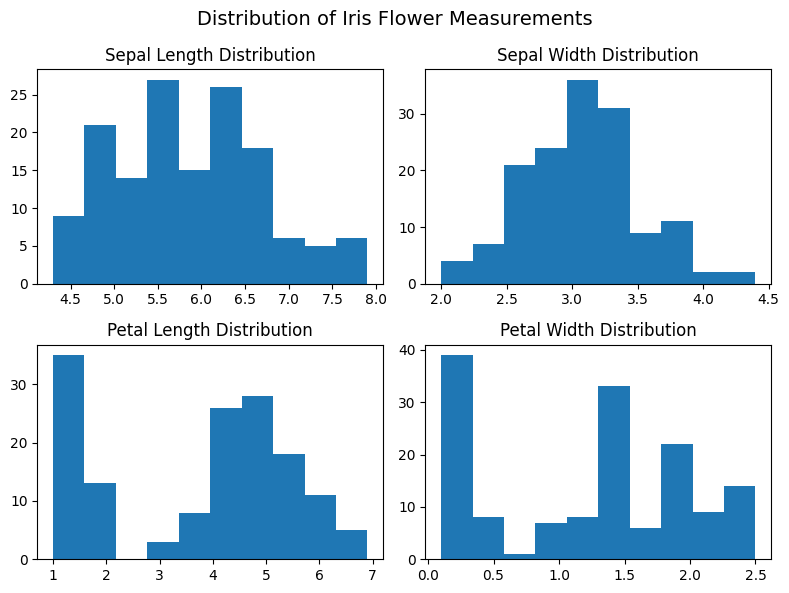

In [14]:
# Chart - 1 Histogram visualization code for distribution of numerical variables
# Create a figure with subplots
plt.figure(figsize=(8, 6))
plt.suptitle('Distribution of Iris Flower Measurements', fontsize=14)

# Create a 2x2 grid of subplots
plt.subplot(2, 2, 1)  # Subplot 1 (Top-Left)
plt.hist(new_df['SepalLengthCm'])
plt.title('Sepal Length Distribution')

plt.subplot(2, 2, 2)  # Subplot 2 (Top-Right)
plt.hist(new_df['SepalWidthCm'])
plt.title('Sepal Width Distribution')

plt.subplot(2, 2, 3)  # Subplot 3 (Bottom-Left)
plt.hist(new_df['PetalLengthCm'])
plt.title('Petal Length Distribution')

plt.subplot(2, 2, 4)  # Subplot 4 (Bottom-Right)
plt.hist(new_df['PetalWidthCm'])
plt.title('Petal Width Distribution')

# Display the subplots
plt.tight_layout()  # Helps in adjusting the layout
plt.show()

## Chart - 2 : Sepal Length vs Sepal Width

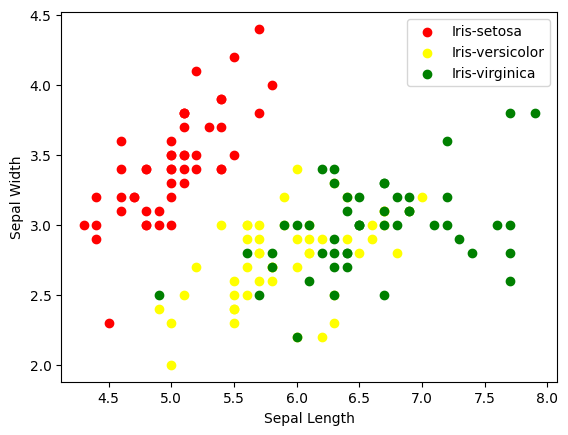

In [15]:
# Chart - 2 Scatter plot visualization code for Sepal Length vs Sepal Width.
# Define colors for each species and the corresponding species labels.
colors = ['red', 'yellow', 'green']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
     

# Chart - 2 Scatter plot visualization code for Sepal Length vs Sepal Width.
# Create a scatter plot for Sepal Length vs Sepal Width for each species.
for i in range(3):
    # Select data for the current species.
    x = new_df[new_df['Species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()


## Chart - 3 : Petal Length vs Petal Width

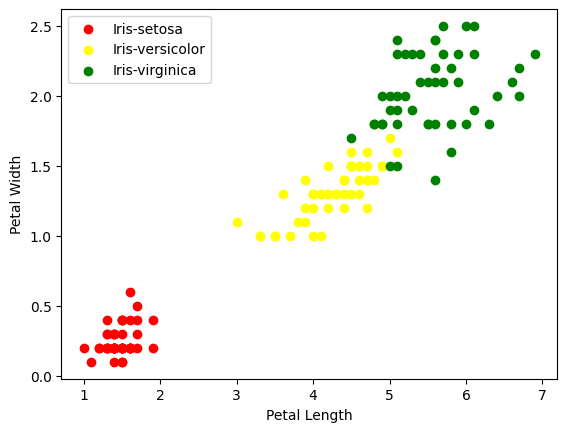

In [16]:
# Chart - 3 Scatter plot visualization code for Petal Length vs Petal Width.
# Create a scatter plot for Petal Length vs Petal Width for each species.
for i in range(3):
    # Select data for the current species.
    x = new_df[new_df['Species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

## Chart - 4 : Sepal Length vs Petal Length

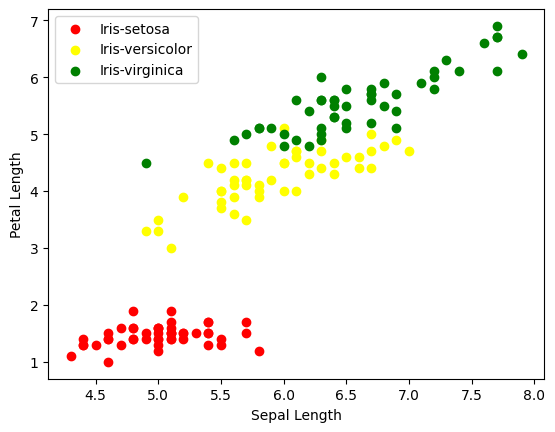

In [17]:

# Chart - 4 Scatter plot visualization code for Sepal Length vs Petal Length.
# Create a scatter plot for Sepal Length vs Petal Length for each species.
for i in range(3):
    # Select data for the current species.
    x = new_df[new_df['Species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

## Chart - 5 : Sepal Width vs Petal Width

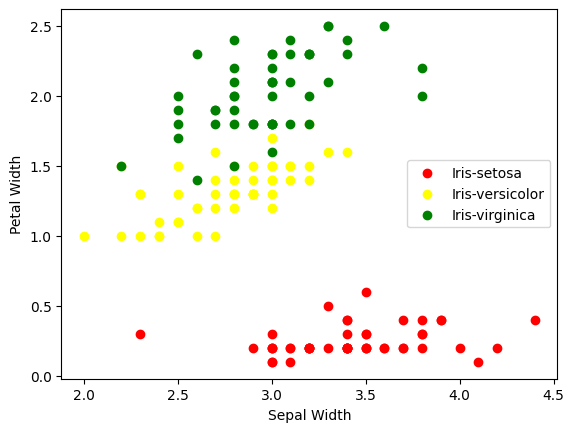

In [18]:
# Chart - 5 Scatter plot visualization code for Sepal Width vs Petal Width.
# Create a scatter plot for Sepal Width vs Petal Width for each species.
for i in range(3):
    # Select data for the current species.
    x = new_df[new_df['Species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

 ## Chart - 6 : Correlation Heatmap

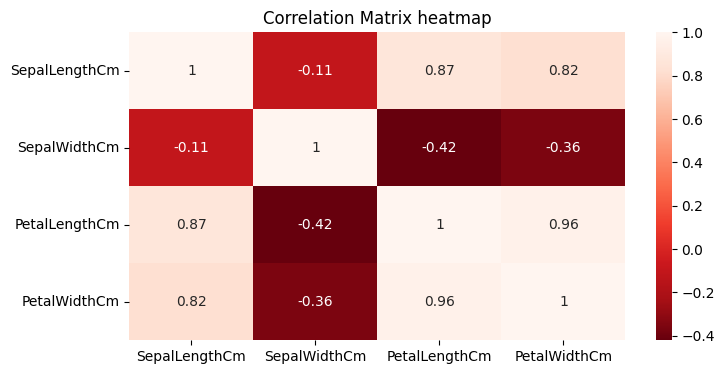

In [19]:
# Correlation Heatmap Visualization Code
#conversion of coerr_data for correlation Heatmap
coerr_data=new_df.drop('Species', axis='columns')
corr_matrix = coerr_data.corr()

# Plot Heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap='Reds_r')

# Setting Labels
plt.title('Correlation Matrix heatmap')

# Display Chart
plt.show()
     

# 4-Feature engineering and Data pre-processing

### 1.conversion of categorical data 

In [20]:
# Encode the categorical columns
# Create a LabelEncoder object
le = LabelEncoder()

# Encode the 'Species' column to convert the species names to numerical labels
new_df['Species'] = le.fit_transform(new_df['Species'])

# Check the unique values in the 'Species' column after encoding
unique_species = new_df['Species'].unique()

# Display the unique encoded values
print("Encoded Species Values:")
print(unique_species) # 'Iris-setosa' == 0, 'Iris-versicolor' == 1, 'Iris-virginica' == 2
     

Encoded Species Values:
[0 1 2]


In [21]:
new_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## 2. Data scaling

In [22]:
#Defining  the X and y  for model training
X=new_df.drop('Species',axis='columns')
y=new_df.Species

## 3. Data spliting 

In [23]:
# Splitting the data to train and test
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3)

In [24]:
# Checking the train distribution of dependent variable
y_test.value_counts()

Species
2    18
1    15
0    12
Name: count, dtype: int64

# 5- ML MODEL IMPLEMENTATION

In [25]:
def evaluate_model(model, x_train, x_test, y_train, y_test):
    
    # Fit the model to the training data.
    model.fit(x_train, y_train)

    # make predictions on the test data
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # calculate confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(11,4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


    # calculate classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_test).T.iloc[:, :-1], annot=True, cmap="Blues")

    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, F1_train, F1_test ]
    return model_score
     
    

In [26]:
# Create a score dataframe
score = pd.DataFrame(index = ['Precision Train', 'Precision Test','Recall Train','Recall Test','Accuracy Train', 'Accuracy Test', 'F1 macro Train', 'F1 macro Test'])
     

## Ml model-1: Logistic regression

In [27]:
# ML Model - 1 Implementation
lr_model = LogisticRegression(fit_intercept=True, max_iter=10000)

# Model is trained (fit) and predicted in the evaluate model

### 1. 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Confusion Matrix:


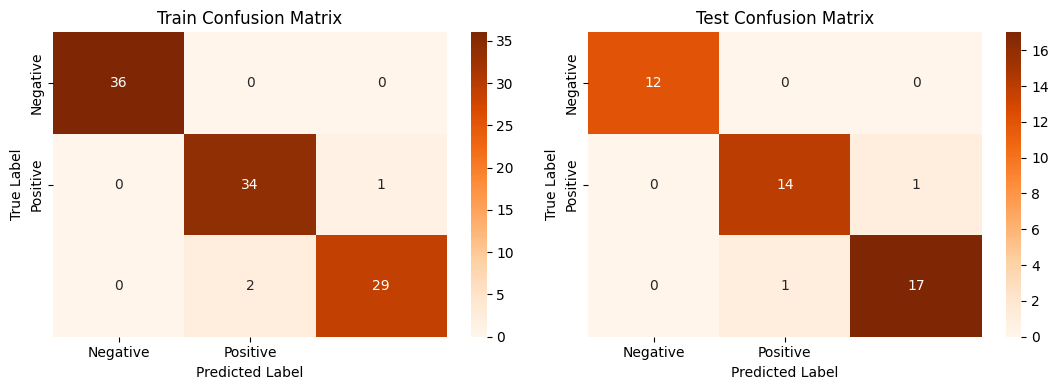


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  36        |
| 1            |    0.944444 | 0.971429 |   0.957746 |  35        |
| 2            |    0.966667 | 0.935484 |   0.95082  |  31        |
| accuracy     |    0.970588 | 0.970588 |   0.970588 |   0.970588 |
| macro avg    |    0.97037  | 0.968971 |   0.969522 | 102        |
| weighted avg |    0.970806 | 0.970588 |   0.970554 | 102        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 12        |
| 1            |    0.933333 | 0.933333 |   0.933333 | 15        |
| 2            |    0.944444 | 0.944444 |   0.944444 | 18        |
| accuracy     |    0.955556 | 0.955556 |   0.955556 |  0.9555

In [28]:

# Visualizing evaluation Metric Score chart
lr_score = evaluate_model(lr_model, X_train, X_test, y_train, y_test)
     

In [29]:
# Updated Evaluation metric Score Chart
score['Logistic regression'] = lr_score
score

,Logistic regression
Precision Train,0.970806
Precision Test,0.955556
Recall Train,0.970588
Recall Test,0.955556
Accuracy Train,0.970588
Accuracy Test,0.955556
F1 macro Train,0.970554
F1 macro Test,0.955556


### 2. Cross- Validation & Hyperparameter Tuning

In [30]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'C': [100,10,1,0.1,0.01,0.001,0.0001],
              'penalty': ['l1', 'l2'],
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# Initializing the logistic regression model
logreg = LogisticRegression(fit_intercept=True, max_iter=10000, random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=4, random_state=0)

# Using GridSearchCV to tune the hyperparameters using cross-validation
grid = GridSearchCV(logreg, param_grid, cv=rskf)
grid.fit(X_train, y_train)

# Select the best hyperparameters found by GridSearchCV
best_params = grid.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}


In [31]:
# Initiate model with best parameters
lr_model2 = LogisticRegression(C=best_params['C'],
                                  penalty=best_params['penalty'],
                                  solver=best_params['solver'],
                                  max_iter=10000, random_state=0)


Confusion Matrix:


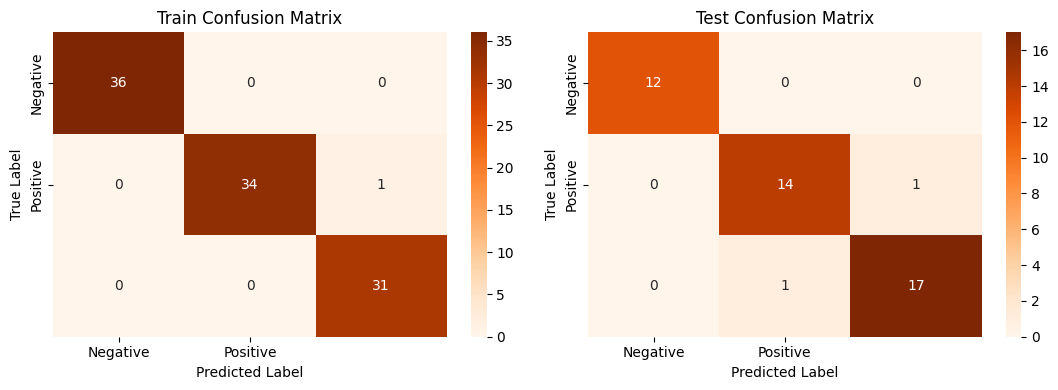


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  36        |
| 1            |    1        | 0.971429 |   0.985507 |  35        |
| 2            |    0.96875  | 1        |   0.984127 |  31        |
| accuracy     |    0.990196 | 0.990196 |   0.990196 |   0.990196 |
| macro avg    |    0.989583 | 0.990476 |   0.989878 | 102        |
| weighted avg |    0.990502 | 0.990196 |   0.990203 | 102        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 12        |
| 1            |    0.933333 | 0.933333 |   0.933333 | 15        |
| 2            |    0.944444 | 0.944444 |   0.944444 | 18        |
| accuracy     |    0.955556 | 0.955556 |   0.955556 |  0.9555

In [32]:

# Visualizing evaluation Metric Score chart
lr_score2 = evaluate_model(lr_model2, X_train, X_test, y_train, y_test)


In [33]:
# Updated Evaluation metric Score Chart
score['Logistic regression'] = lr_score
score
     

,Logistic regression
Precision Train,0.970806
Precision Test,0.955556
Recall Train,0.970588
Recall Test,0.955556
Accuracy Train,0.970588
Accuracy Test,0.955556
F1 macro Train,0.970554
F1 macro Test,0.955556


# ML MODEL -2  Decision Tree


In [34]:
# ML Model - 2 Implementation
dt_model = DecisionTreeClassifier(random_state=20)

# Model is trained (fit) and predicted in the evaluate model
     

### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Confusion Matrix:


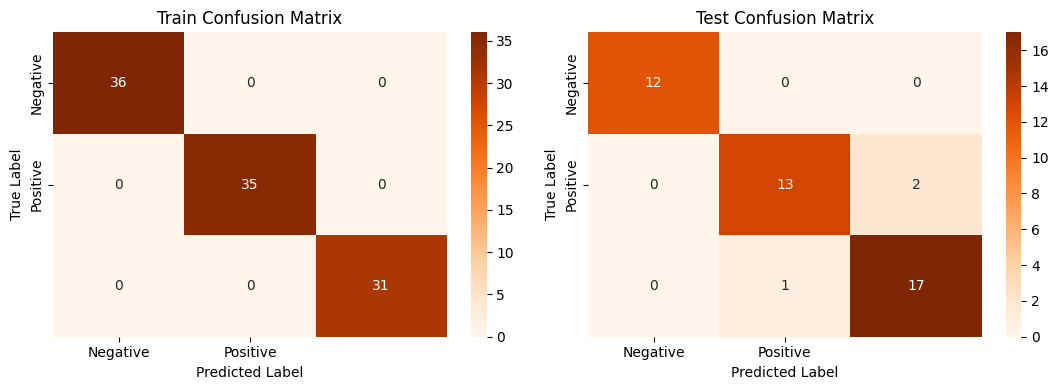


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        36 |
| 1            |           1 |        1 |          1 |        35 |
| 2            |           1 |        1 |          1 |        31 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       102 |
| weighted avg |           1 |        1 |          1 |       102 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 12        |
| 1            |    0.928571 | 0.866667 |   0.896552 | 15        |
| 2            |    0.894737 | 0.944444 |   0.918919 | 18        |
| accuracy     |    0.933333 | 0.933333 |   0.933333 |  0.933333 |
| m

In [35]:
# Visualizing evaluation Metric Score chart
dt_score = evaluate_model(dt_model, X_train, X_test, y_train, y_test)

In [36]:

# Updated Evaluation metric Score Chart
score['Decision Tree'] = dt_score
score

,Logistic regression,Decision Tree
Precision Train,0.970806,1.000000
Precision Test,0.955556,0.934085
Recall Train,0.970588,1.000000
Recall Test,0.955556,0.933333
Accuracy Train,0.970588,1.000000
Accuracy Test,0.955556,0.933333
F1 macro Train,0.970554,1.000000
F1 macro Test,0.955556,0.933085


### 2.cross-validation & Hyperparaeter Tuning

In [37]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
grid = {'max_depth' : [3,4,5,6,7,8],
        'min_samples_split' : np.arange(2,8),
        'min_samples_leaf' : np.arange(10,20)}

# Initialize the model
model = DecisionTreeClassifier()

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize GridSearchCV
grid_search = GridSearchCV(model, grid, cv=rskf)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Select the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'max_depth': 3, 'min_samples_leaf': np.int64(10), 'min_samples_split': np.int64(2)}


In [38]:

# Train a new model with the best hyperparameters
dt_model2 = DecisionTreeClassifier(max_depth=best_params['max_depth'],
                                 min_samples_leaf=best_params['min_samples_leaf'],
                                 min_samples_split=best_params['min_samples_split'],
                                 random_state=20)
     


Confusion Matrix:


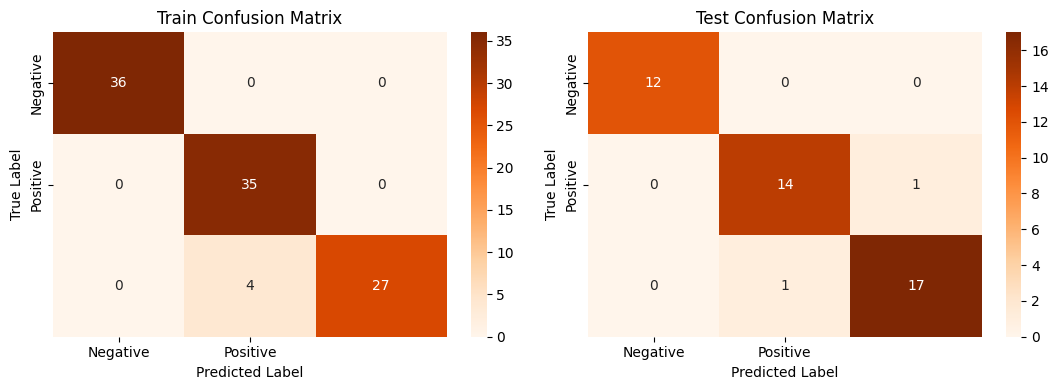


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  36        |
| 1            |    0.897436 | 1        |   0.945946 |  35        |
| 2            |    1        | 0.870968 |   0.931034 |  31        |
| accuracy     |    0.960784 | 0.960784 |   0.960784 |   0.960784 |
| macro avg    |    0.965812 | 0.956989 |   0.958993 | 102        |
| weighted avg |    0.964806 | 0.960784 |   0.960492 | 102        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 12        |
| 1            |    0.933333 | 0.933333 |   0.933333 | 15        |
| 2            |    0.944444 | 0.944444 |   0.944444 | 18        |
| accuracy     |    0.955556 | 0.955556 |   0.955556 |  0.9555

In [39]:

# Visualizing evaluation Metric Score chart
dt2_score = evaluate_model(dt_model2, X_train, X_test, y_train, y_test)

In [40]:


score['Decision Tree tuned'] = dt2_score

In [41]:
# Updated Evaluation metric Score Chart
score
     

,Logistic regression,Decision Tree,Decision Tree tuned
Precision Train,0.970806,1.000000,0.964806
Precision Test,0.955556,0.934085,0.955556
Recall Train,0.970588,1.000000,0.960784
Recall Test,0.955556,0.933333,0.955556
Accuracy Train,0.970588,1.000000,0.960784
Accuracy Test,0.955556,0.933333,0.955556
F1 macro Train,0.970554,1.000000,0.960492
F1 macro Test,0.955556,0.933085,0.955556


# ML Model-3 Random Forest

In [42]:
# ML Model - 3 Implementation
rf_model = RandomForestClassifier(random_state=0)

# Model is trained (fit) and predicted in the evaluate model
     

### 1 Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Confusion Matrix:


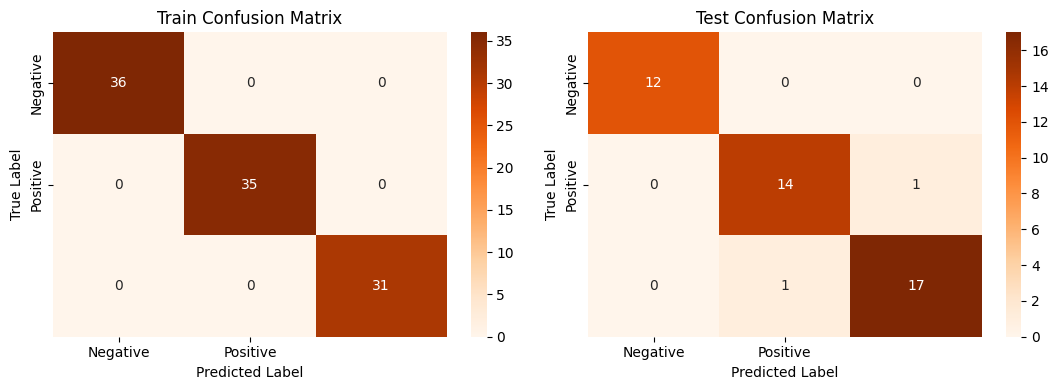


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        36 |
| 1            |           1 |        1 |          1 |        35 |
| 2            |           1 |        1 |          1 |        31 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       102 |
| weighted avg |           1 |        1 |          1 |       102 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 12        |
| 1            |    0.933333 | 0.933333 |   0.933333 | 15        |
| 2            |    0.944444 | 0.944444 |   0.944444 | 18        |
| accuracy     |    0.955556 | 0.955556 |   0.955556 |  0.955556 |
| m

In [43]:

# Visualizing evaluation Metric Score chart
rf_score = evaluate_model(rf_model, X_train, X_test, y_train, y_test)
     

In [44]:

# Updated Evaluation metric Score Chart
score['Random Forest'] = rf_score
score

,Logistic regression,Decision Tree,Decision Tree tuned,Random Forest
Precision Train,0.970806,1.000000,0.964806,1.000000
Precision Test,0.955556,0.934085,0.955556,0.955556
Recall Train,0.970588,1.000000,0.960784,1.000000
Recall Test,0.955556,0.933333,0.955556,0.955556
Accuracy Train,0.970588,1.000000,0.960784,1.000000
Accuracy Test,0.955556,0.933333,0.955556,0.955556
F1 macro Train,0.970554,1.000000,0.960492,1.000000
F1 macro Test,0.955556,0.933085,0.955556,0.955556


### 3.Cross- Validation & Hyperparameter Tuning

In [45]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
grid = {'n_estimators': [10, 50, 100, 200],
              'max_depth': [8, 9, 10, 11, 12,13, 14, 15],
              'min_samples_split': [2, 3, 4, 5]}

# Initialize the model
rf = RandomForestClassifier(random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomSearchCV
random_search = RandomizedSearchCV(rf, grid,cv=rskf, n_iter=10, n_jobs=-1)

# Fit the RandomSearchCV to the training data
random_search.fit(X_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)
    


Best hyperparameters:  {'n_estimators': 100, 'min_samples_split': 4, 'max_depth': 15}


In [46]:

# Initialize model with best parameters
rf_model2 = RandomForestClassifier(n_estimators = best_params['n_estimators'],
                                 min_samples_leaf= best_params['min_samples_split'],
                                 max_depth = best_params['max_depth'],
                                 random_state=0)
     


Confusion Matrix:


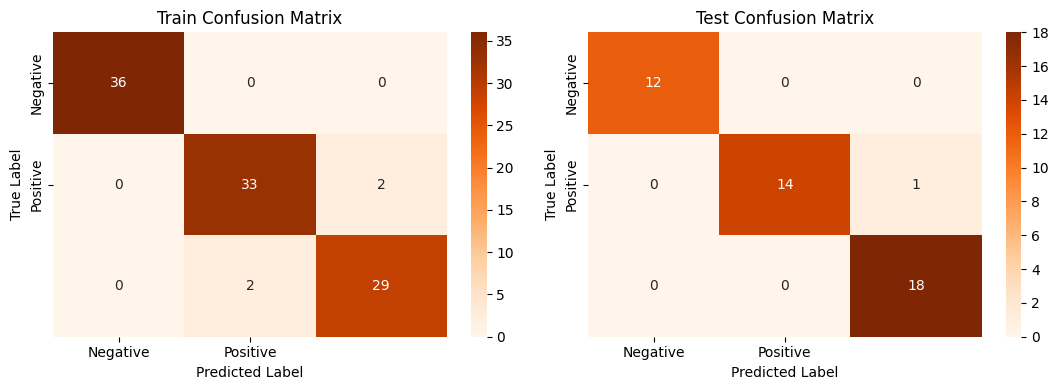


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  36        |
| 1            |    0.942857 | 0.942857 |   0.942857 |  35        |
| 2            |    0.935484 | 0.935484 |   0.935484 |  31        |
| accuracy     |    0.960784 | 0.960784 |   0.960784 |   0.960784 |
| macro avg    |    0.959447 | 0.959447 |   0.959447 | 102        |
| weighted avg |    0.960784 | 0.960784 |   0.960784 | 102        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 12        |
| 1            |    1        | 0.933333 |   0.965517 | 15        |
| 2            |    0.947368 | 1        |   0.972973 | 18        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

In [47]:

# Visualizing evaluation Metric Score chart
rf2_score = evaluate_model(rf_model2, X_train, X_test, y_train, y_test)
     

In [48]:

score['Random Forest tuned'] = rf2_score

In [49]:

score['Random Forest tuned'] = rf2_score

In [50]:
score

,Logistic regression,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned
Precision Train,0.970806,1.000000,0.964806,1.000000,0.960784
Precision Test,0.955556,0.934085,0.955556,0.955556,0.978947
Recall Train,0.970588,1.000000,0.960784,1.000000,0.960784
Recall Test,0.955556,0.933333,0.955556,0.955556,0.977778
Accuracy Train,0.970588,1.000000,0.960784,1.000000,0.960784
Accuracy Test,0.955556,0.933333,0.955556,0.955556,0.977778
F1 macro Train,0.970554,1.000000,0.960492,1.000000,0.960784
F1 macro Test,0.955556,0.933085,0.955556,0.955556,0.977695


# ML model-4 : SVM(Support Vector Machine)

In [51]:
# ML Model - 4 Implementation
svm_model = SVC(kernel='linear', random_state=0, probability=True)

# Model is trained (fit) and predicted in the evaluate model

In [52]:
### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Confusion Matrix:


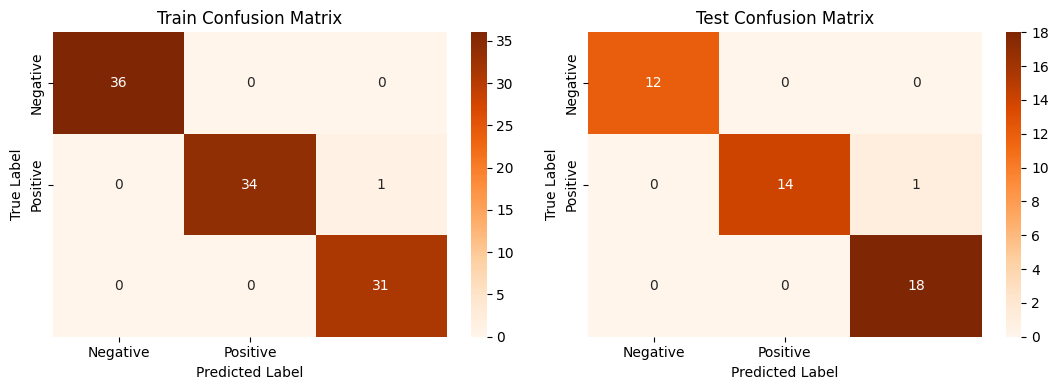


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  36        |
| 1            |    1        | 0.971429 |   0.985507 |  35        |
| 2            |    0.96875  | 1        |   0.984127 |  31        |
| accuracy     |    0.990196 | 0.990196 |   0.990196 |   0.990196 |
| macro avg    |    0.989583 | 0.990476 |   0.989878 | 102        |
| weighted avg |    0.990502 | 0.990196 |   0.990203 | 102        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 12        |
| 1            |    1        | 0.933333 |   0.965517 | 15        |
| 2            |    0.947368 | 1        |   0.972973 | 18        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

In [53]:
# Visualizing evaluation Metric Score chart
svm_score = evaluate_model(svm_model, X_train, X_test, y_train, y_test)

In [54]:
# Updated Evaluation metric Score Chart
score['SVM'] = svm_score
score

,Logistic regression,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM
Precision Train,0.970806,1.000000,0.964806,1.000000,0.960784,0.990502
Precision Test,0.955556,0.934085,0.955556,0.955556,0.978947,0.978947
Recall Train,0.970588,1.000000,0.960784,1.000000,0.960784,0.990196
Recall Test,0.955556,0.933333,0.955556,0.955556,0.977778,0.977778
Accuracy Train,0.970588,1.000000,0.960784,1.000000,0.960784,0.990196
Accuracy Test,0.955556,0.933333,0.955556,0.955556,0.977778,0.977778
F1 macro Train,0.970554,1.000000,0.960492,1.000000,0.960784,0.990203
F1 macro Test,0.955556,0.933085,0.955556,0.955556,0.977695,0.977695


### 2.  cross-validation & Hyperparameter Tuning


In [55]:
# ML Model - 4 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'C': np.arange(0.1, 10, 0.1),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'degree': np.arange(2, 6, 1)}

# Initialize the model
svm = SVC(random_state=0, probability=True)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV with kfold cross-validation
random_search = RandomizedSearchCV(svm, param_grid, n_iter=10, cv=rskf, n_jobs=-1)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)
     

Best hyperparameters:  {'kernel': 'rbf', 'degree': np.int64(3), 'C': np.float64(9.6)}


In [56]:
# Initialize model with best parameters
svm_model2 = SVC(C = best_params['C'],
           kernel = best_params['kernel'],
           degree = best_params['degree'],
           random_state=0, probability=True)
     


Confusion Matrix:


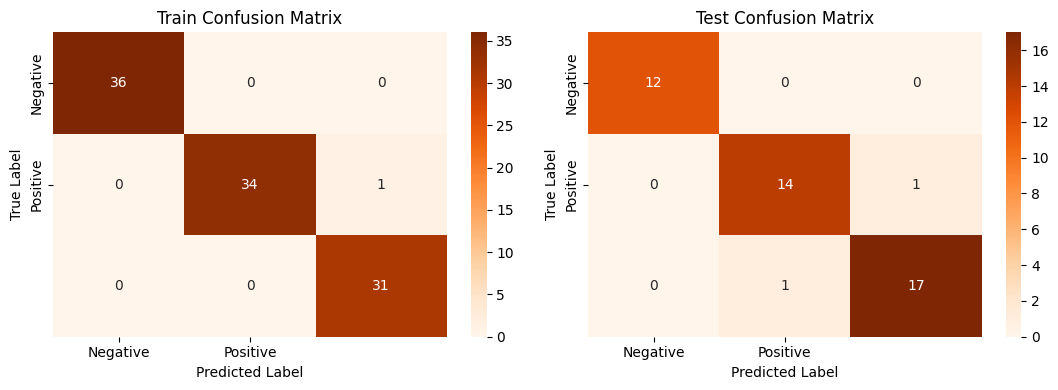


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  36        |
| 1            |    1        | 0.971429 |   0.985507 |  35        |
| 2            |    0.96875  | 1        |   0.984127 |  31        |
| accuracy     |    0.990196 | 0.990196 |   0.990196 |   0.990196 |
| macro avg    |    0.989583 | 0.990476 |   0.989878 | 102        |
| weighted avg |    0.990502 | 0.990196 |   0.990203 | 102        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 12        |
| 1            |    0.933333 | 0.933333 |   0.933333 | 15        |
| 2            |    0.944444 | 0.944444 |   0.944444 | 18        |
| accuracy     |    0.955556 | 0.955556 |   0.955556 |  0.9555

In [57]:
# Visualizing evaluation Metric Score chart
svm2_score = evaluate_model(svm_model2, X_train, X_test, y_train, y_test)
     

In [58]:
score['SVM tuned'] = svm2_score

In [59]:
# Updated Evaluation metric Score Chart
score

,Logistic regression,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned
Precision Train,0.970806,1.000000,0.964806,1.000000,0.960784,0.990502,0.990502
Precision Test,0.955556,0.934085,0.955556,0.955556,0.978947,0.978947,0.955556
Recall Train,0.970588,1.000000,0.960784,1.000000,0.960784,0.990196,0.990196
Recall Test,0.955556,0.933333,0.955556,0.955556,0.977778,0.977778,0.955556
Accuracy Train,0.970588,1.000000,0.960784,1.000000,0.960784,0.990196,0.990196
Accuracy Test,0.955556,0.933333,0.955556,0.955556,0.977778,0.977778,0.955556
F1 macro Train,0.970554,1.000000,0.960492,1.000000,0.960784,0.990203,0.990203
F1 macro Test,0.955556,0.933085,0.955556,0.955556,0.977695,0.977695,0.955556


# ML Model-5 Xtreme Gradient Boosting

In [60]:
# ML Model - 5 Implementation
xgb_model = xgb.XGBClassifier()

# Model is trained (fit) and predicted in the evaluate model

### 1. . Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Confusion Matrix:


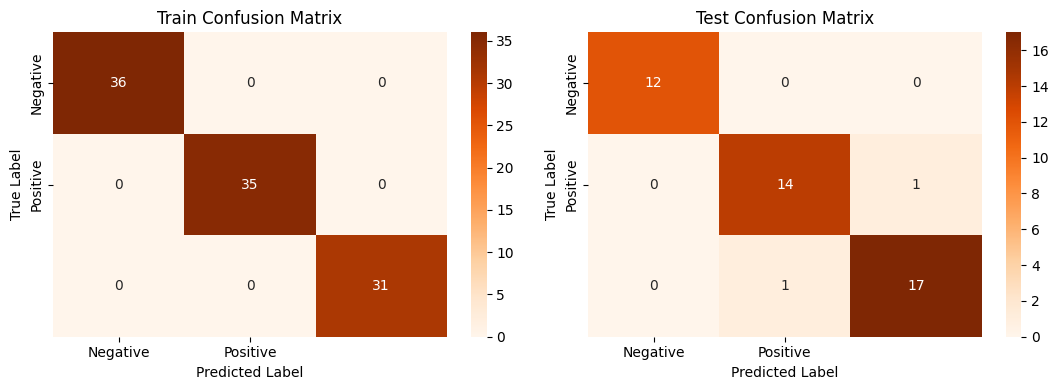


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        36 |
| 1            |           1 |        1 |          1 |        35 |
| 2            |           1 |        1 |          1 |        31 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       102 |
| weighted avg |           1 |        1 |          1 |       102 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 12        |
| 1            |    0.933333 | 0.933333 |   0.933333 | 15        |
| 2            |    0.944444 | 0.944444 |   0.944444 | 18        |
| accuracy     |    0.955556 | 0.955556 |   0.955556 |  0.955556 |
| m

In [61]:
# Visualizing evaluation Metric Score chart
xgb_score = evaluate_model(xgb_model, X_train, X_test, y_train, y_test)
     

In [62]:
# Updated Evaluation metric Score Chart
score['XGB'] = xgb_score
score

,Logistic regression,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB
Precision Train,0.970806,1.000000,0.964806,1.000000,0.960784,0.990502,0.990502,1.000000
Precision Test,0.955556,0.934085,0.955556,0.955556,0.978947,0.978947,0.955556,0.955556
Recall Train,0.970588,1.000000,0.960784,1.000000,0.960784,0.990196,0.990196,1.000000
Recall Test,0.955556,0.933333,0.955556,0.955556,0.977778,0.977778,0.955556,0.955556
Accuracy Train,0.970588,1.000000,0.960784,1.000000,0.960784,0.990196,0.990196,1.000000
Accuracy Test,0.955556,0.933333,0.955556,0.955556,0.977778,0.977778,0.955556,0.955556
F1 macro Train,0.970554,1.000000,0.960492,1.000000,0.960784,0.990203,0.990203,1.000000
F1 macro Test,0.955556,0.933085,0.955556,0.955556,0.977695,0.977695,0.955556,0.955556


### 2.Cross- Validation & Hyperparameter Tuning

In [63]:
# ML Model - 5 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'learning_rate': np.arange(0.01, 0.3, 0.01),
              'max_depth': np.arange(3, 15, 1),
              'n_estimators': np.arange(100, 200, 10)}

# Initialize the model
xgb2 = xgb.XGBClassifier(random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(xgb2, param_grid, n_iter=10, cv=rskf)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'n_estimators': np.int64(150), 'max_depth': np.int64(13), 'learning_rate': np.float64(0.14)}


In [64]:
# Initialize model with best parameters
xgb_model2 = xgb.XGBClassifier(learning_rate = best_params['learning_rate'],
                                 max_depth = best_params['max_depth'],
                               n_estimators = best_params['n_estimators'],
                                 random_state=0)


Confusion Matrix:


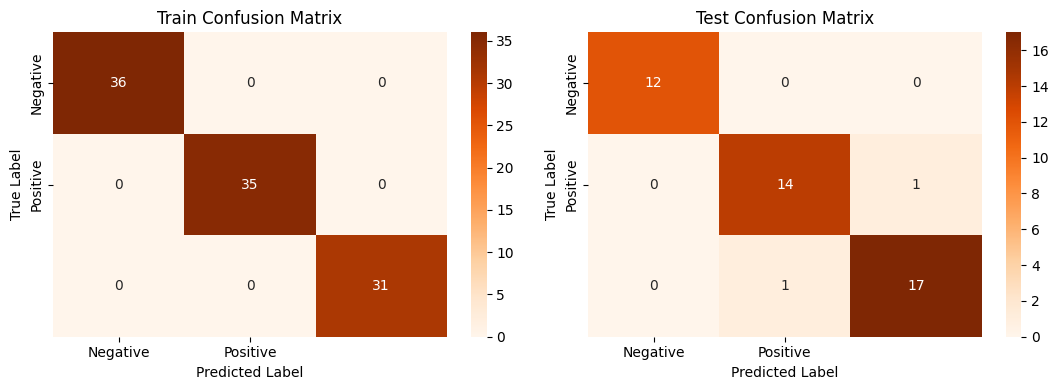


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        36 |
| 1            |           1 |        1 |          1 |        35 |
| 2            |           1 |        1 |          1 |        31 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       102 |
| weighted avg |           1 |        1 |          1 |       102 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 12        |
| 1            |    0.933333 | 0.933333 |   0.933333 | 15        |
| 2            |    0.944444 | 0.944444 |   0.944444 | 18        |
| accuracy     |    0.955556 | 0.955556 |   0.955556 |  0.955556 |
| m

In [65]:

# Visualizing evaluation Metric Score chart
xgb2_score = evaluate_model(xgb_model2, X_train, X_test, y_train, y_test)

In [66]:
score['XGB tuned'] = xgb2_score

In [67]:

# Updated Evaluation metric Score Chart
score

,Logistic regression,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB,XGB tuned
Precision Train,0.970806,1.000000,0.964806,1.000000,0.960784,0.990502,0.990502,1.000000,1.000000
Precision Test,0.955556,0.934085,0.955556,0.955556,0.978947,0.978947,0.955556,0.955556,0.955556
Recall Train,0.970588,1.000000,0.960784,1.000000,0.960784,0.990196,0.990196,1.000000,1.000000
Recall Test,0.955556,0.933333,0.955556,0.955556,0.977778,0.977778,0.955556,0.955556,0.955556
Accuracy Train,0.970588,1.000000,0.960784,1.000000,0.960784,0.990196,0.990196,1.000000,1.000000
Accuracy Test,0.955556,0.933333,0.955556,0.955556,0.977778,0.977778,0.955556,0.955556,0.955556
F1 macro Train,0.970554,1.000000,0.960492,1.000000,0.960784,0.990203,0.990203,1.000000,1.000000
F1 macro Test,0.955556,0.933085,0.955556,0.955556,0.977695,0.977695,0.955556,0.955556,0.955556


# ML Model -6: Naive Bayes

In [68]:
# ML Model - 6 Implementation
nb_model = GaussianNB()

# Model is trained (fit) and predicted in the evaluate model

### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Confusion Matrix:


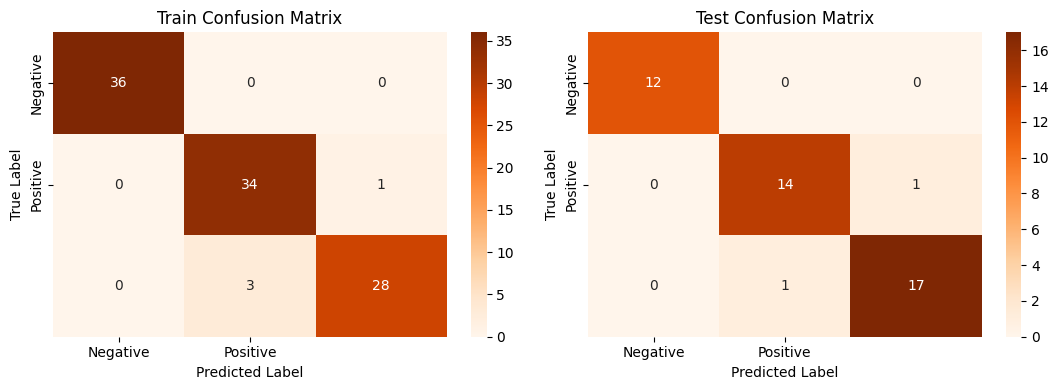


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  36        |
| 1            |    0.918919 | 0.971429 |   0.944444 |  35        |
| 2            |    0.965517 | 0.903226 |   0.933333 |  31        |
| accuracy     |    0.960784 | 0.960784 |   0.960784 |   0.960784 |
| macro avg    |    0.961479 | 0.958218 |   0.959259 | 102        |
| weighted avg |    0.961698 | 0.960784 |   0.960675 | 102        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 12        |
| 1            |    0.933333 | 0.933333 |   0.933333 | 15        |
| 2            |    0.944444 | 0.944444 |   0.944444 | 18        |
| accuracy     |    0.955556 | 0.955556 |   0.955556 |  0.9555

In [69]:
# Visualizing evaluation Metric Score chart
nb_score = evaluate_model(nb_model, X_train, X_test, y_train, y_test)

In [70]:
# Updated Evaluation metric Score Chart
score['Naive Bayes'] = nb_score
score

,Logistic regression,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB,XGB tuned,Naive Bayes
Precision Train,0.970806,1.000000,0.964806,1.000000,0.960784,0.990502,0.990502,1.000000,1.000000,0.961698
Precision Test,0.955556,0.934085,0.955556,0.955556,0.978947,0.978947,0.955556,0.955556,0.955556,0.955556
Recall Train,0.970588,1.000000,0.960784,1.000000,0.960784,0.990196,0.990196,1.000000,1.000000,0.960784
Recall Test,0.955556,0.933333,0.955556,0.955556,0.977778,0.977778,0.955556,0.955556,0.955556,0.955556
Accuracy Train,0.970588,1.000000,0.960784,1.000000,0.960784,0.990196,0.990196,1.000000,1.000000,0.960784
Accuracy Test,0.955556,0.933333,0.955556,0.955556,0.977778,0.977778,0.955556,0.955556,0.955556,0.955556
F1 macro Train,0.970554,1.000000,0.960492,1.000000,0.960784,0.990203,0.990203,1.000000,1.000000,0.960675
F1 macro Test,0.955556,0.933085,0.955556,0.955556,0.977695,0.977695,0.955556,0.955556,0.955556,0.955556


### 2. Cross-Validation &Hyperparameter Tuning 

In [71]:
# ML Model - 6 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

# Initialize the model
naive = GaussianNB()

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=4, n_repeats=4, random_state=0)

# Initialize GridSearchCV
GridSearch = GridSearchCV(naive, param_grid, cv=rskf, n_jobs=-1)

# Fit the GridSearchCV to the training data
GridSearch.fit(X_train, y_train)

# Select the best hyperparameters
best_params = GridSearch.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'var_smoothing': np.float64(0.012328467394420659)}


In [72]:
# Initiate model with best parameters
nb_model2 = GaussianNB(var_smoothing = best_params['var_smoothing'])


Confusion Matrix:


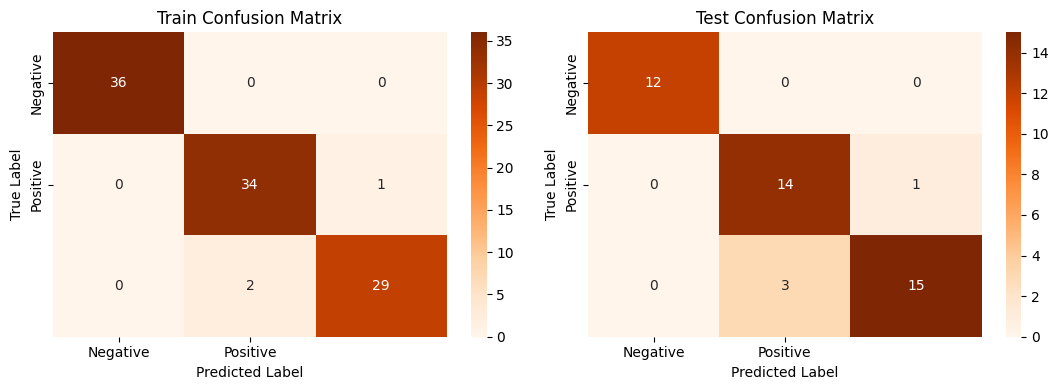


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  36        |
| 1            |    0.944444 | 0.971429 |   0.957746 |  35        |
| 2            |    0.966667 | 0.935484 |   0.95082  |  31        |
| accuracy     |    0.970588 | 0.970588 |   0.970588 |   0.970588 |
| macro avg    |    0.97037  | 0.968971 |   0.969522 | 102        |
| weighted avg |    0.970806 | 0.970588 |   0.970554 | 102        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 12        |
| 1            |    0.823529 | 0.933333 |   0.875    | 15        |
| 2            |    0.9375   | 0.833333 |   0.882353 | 18        |
| accuracy     |    0.911111 | 0.911111 |   0.911111 |  0.9111

In [73]:
# Visualizing evaluation Metric Score chart
nb2_score = evaluate_model(nb_model2, X_train, X_test, y_train, y_test)

In [74]:

score['Naive Bayes tuned']= nb2_score

In [75]:
# Updated Evaluation metric Score Chart
score

,Logistic regression,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB,XGB tuned,Naive Bayes,Naive Bayes tuned
Precision Train,0.970806,1.000000,0.964806,1.000000,0.960784,0.990502,0.990502,1.000000,1.000000,0.961698,0.970806
Precision Test,0.955556,0.934085,0.955556,0.955556,0.978947,0.978947,0.955556,0.955556,0.955556,0.955556,0.916176
Recall Train,0.970588,1.000000,0.960784,1.000000,0.960784,0.990196,0.990196,1.000000,1.000000,0.960784,0.970588
Recall Test,0.955556,0.933333,0.955556,0.955556,0.977778,0.977778,0.955556,0.955556,0.955556,0.955556,0.911111
Accuracy Train,0.970588,1.000000,0.960784,1.000000,0.960784,0.990196,0.990196,1.000000,1.000000,0.960784,0.970588
Accuracy Test,0.955556,0.933333,0.955556,0.955556,0.977778,0.977778,0.955556,0.955556,0.955556,0.955556,0.911111
F1 macro Train,0.970554,1.000000,0.960492,1.000000,0.960784,0.990203,0.990203,1.000000,1.000000,0.960675,0.970554
F1 macro Test,0.955556,0.933085,0.955556,0.955556,0.977695,0.977695,0.955556,0.955556,0.955556,0.955556,0.911275


# ML model-7 : Neural Network

In [76]:
# ML Model - 7 Implementation
nn_model = MLPClassifier(random_state=0)

# Model is trained (fit) and predicted in the evaluate model

### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Confusion Matrix:


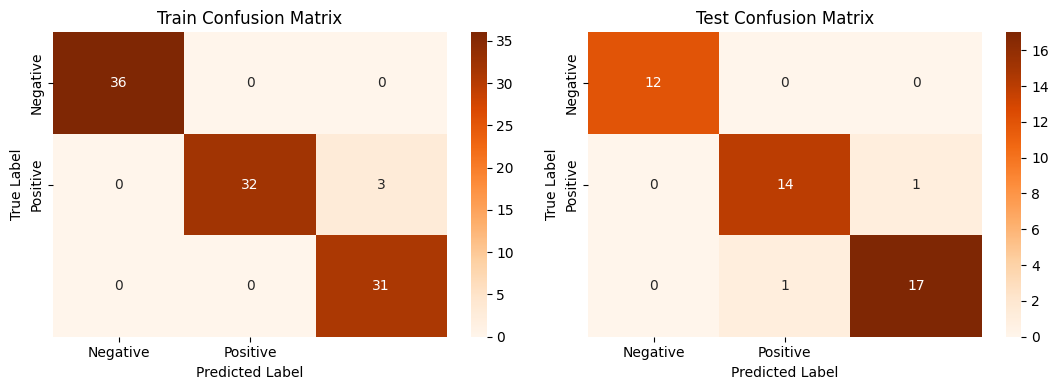


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  36        |
| 1            |    1        | 0.914286 |   0.955224 |  35        |
| 2            |    0.911765 | 1        |   0.953846 |  31        |
| accuracy     |    0.970588 | 0.970588 |   0.970588 |   0.970588 |
| macro avg    |    0.970588 | 0.971429 |   0.96969  | 102        |
| weighted avg |    0.973183 | 0.970588 |   0.970608 | 102        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 12        |
| 1            |    0.933333 | 0.933333 |   0.933333 | 15        |
| 2            |    0.944444 | 0.944444 |   0.944444 | 18        |
| accuracy     |    0.955556 | 0.955556 |   0.955556 |  0.9555

In [77]:
# Visualizing evaluation Metric Score chart
neural_score = evaluate_model(nn_model, X_train, X_test, y_train, y_test)

In [78]:
# Updated Evaluation metric Score Chart
score['Neural Network'] = neural_score
score

,Logistic regression,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB,XGB tuned,Naive Bayes,Naive Bayes tuned,Neural Network
Precision Train,0.970806,1.000000,0.964806,1.000000,0.960784,0.990502,0.990502,1.000000,1.000000,0.961698,0.970806,0.973183
Precision Test,0.955556,0.934085,0.955556,0.955556,0.978947,0.978947,0.955556,0.955556,0.955556,0.955556,0.916176,0.955556
Recall Train,0.970588,1.000000,0.960784,1.000000,0.960784,0.990196,0.990196,1.000000,1.000000,0.960784,0.970588,0.970588
Recall Test,0.955556,0.933333,0.955556,0.955556,0.977778,0.977778,0.955556,0.955556,0.955556,0.955556,0.911111,0.955556
Accuracy Train,0.970588,1.000000,0.960784,1.000000,0.960784,0.990196,0.990196,1.000000,1.000000,0.960784,0.970588,0.970588
Accuracy Test,0.955556,0.933333,0.955556,0.955556,0.977778,0.977778,0.955556,0.955556,0.955556,0.955556,0.911111,0.955556
F1 macro Train,0.970554,1.000000,0.960492,1.000000,0.960784,0.990203,0.990203,1.000000,1.000000,0.960675,0.970554,0.970608
F1 macro Test,0.955556,0.933085,0.955556,0.955556,0.977695,0.977695,0.955556,0.955556,0.955556,0.955556,0.911275,0.955556


### 2.Cross-Validation & Hyperparameter Tuning 

In [79]:
# ML Model - 7 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'hidden_layer_sizes': np.arange(10, 100, 10),
              'alpha': np.arange(0.0001, 0.01, 0.0001)}

# Initialize the model
neural = MLPClassifier(random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(neural, param_grid, n_iter=10, cv=rskf, n_jobs=-1)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'hidden_layer_sizes': np.int64(40), 'alpha': np.float64(0.0044)}


In [80]:
# Initiate model with best parameters
nn_model2 = MLPClassifier(hidden_layer_sizes = best_params['hidden_layer_sizes'],
                        alpha = best_params['alpha'],
                        random_state = 0)


Confusion Matrix:


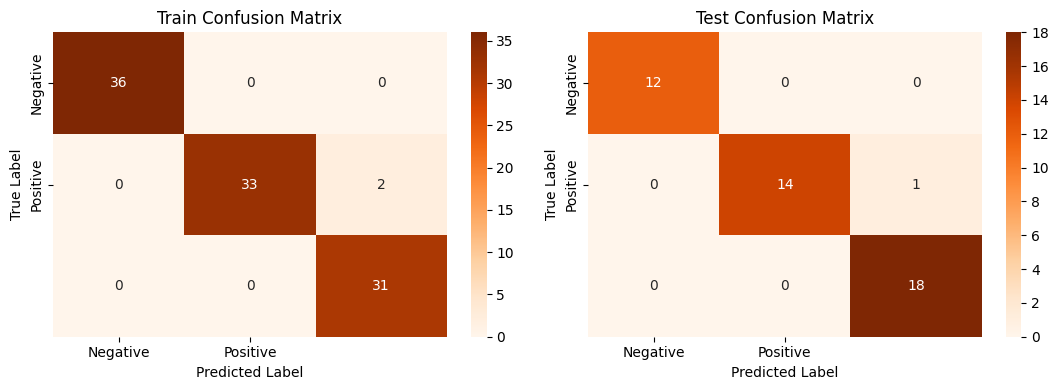


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  36        |
| 1            |    1        | 0.942857 |   0.970588 |  35        |
| 2            |    0.939394 | 1        |   0.96875  |  31        |
| accuracy     |    0.980392 | 0.980392 |   0.980392 |   0.980392 |
| macro avg    |    0.979798 | 0.980952 |   0.979779 | 102        |
| weighted avg |    0.981581 | 0.980392 |   0.98041  | 102        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 12        |
| 1            |    1        | 0.933333 |   0.965517 | 15        |
| 2            |    0.947368 | 1        |   0.972973 | 18        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

In [81]:
# Visualizing evaluation Metric Score chart
neural2_score = evaluate_model(nn_model2, X_train, X_test, y_train, y_test)

In [82]:
score['Neural Network tuned']= neural2_score

In [83]:


# Updated Evaluation metric Score Chart
score
     

,Logistic regression,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB,XGB tuned,Naive Bayes,Naive Bayes tuned,Neural Network,Neural Network tuned
Precision Train,0.970806,1.000000,0.964806,1.000000,0.960784,0.990502,0.990502,1.000000,1.000000,0.961698,0.970806,0.973183,0.981581
Precision Test,0.955556,0.934085,0.955556,0.955556,0.978947,0.978947,0.955556,0.955556,0.955556,0.955556,0.916176,0.955556,0.978947
Recall Train,0.970588,1.000000,0.960784,1.000000,0.960784,0.990196,0.990196,1.000000,1.000000,0.960784,0.970588,0.970588,0.980392
Recall Test,0.955556,0.933333,0.955556,0.955556,0.977778,0.977778,0.955556,0.955556,0.955556,0.955556,0.911111,0.955556,0.977778
Accuracy Train,0.970588,1.000000,0.960784,1.000000,0.960784,0.990196,0.990196,1.000000,1.000000,0.960784,0.970588,0.970588,0.980392
Accuracy Test,0.955556,0.933333,0.955556,0.955556,0.977778,0.977778,0.955556,0.955556,0.955556,0.955556,0.911111,0.955556,0.977778
F1 macro Train,0.970554,1.000000,0.960492,1.000000,0.960784,0.990203,0.990203,1.000000,1.000000,0.960675,0.970554,0.970608,0.980410
F1 macro Test,0.955556,0.933085,0.955556,0.955556,0.977695,0.977695,0.955556,0.955556,0.955556,0.955556,0.911275,0.955556,0.977695


In [84]:


print(score.to_markdown())

|                 |   Logistic regression |   Decision Tree |   Decision Tree tuned |   Random Forest |   Random Forest tuned |      SVM |   SVM tuned |      XGB |   XGB tuned |   Naive Bayes |   Naive Bayes tuned |   Neural Network |   Neural Network tuned |
|:----------------|----------------------:|----------------:|----------------------:|----------------:|----------------------:|---------:|------------:|---------:|------------:|--------------:|--------------------:|-----------------:|-----------------------:|
| Precision Train |              0.970806 |        1        |              0.964806 |        1        |              0.960784 | 0.990502 |    0.990502 | 1        |    1        |      0.961698 |            0.970806 |         0.973183 |               0.981581 |
| Precision Test  |              0.955556 |        0.934085 |              0.955556 |        0.955556 |              0.978947 | 0.978947 |    0.955556 | 0.955556 |    0.955556 |      0.955556 |            0.916176 |     

# Selection of best model

In [85]:
# Removing the overfitted models which have precision, recall, f1 scores for train as 1
score_t = score.transpose()  # taking transpose of the score dataframe to create new difference column
remove_models = score_t[score_t['Recall Train']>=0.98].index  # creating a list of models which have 1 for train and score_t['Accuracy Train']==1.0 and score_t['Precision Train']==1.0 and score_t['F1 macro Train']==1.0
remove_models
 # creating a new dataframe with required models
adj = score_t.drop(remove_models) 
adj
     


,Precision Train,Precision Test,Recall Train,Recall Test,Accuracy Train,Accuracy Test,F1 macro Train,F1 macro Test
Logistic regression,0.970806,0.955556,0.970588,0.955556,0.970588,0.955556,0.970554,0.955556
Decision Tree tuned,0.964806,0.955556,0.960784,0.955556,0.960784,0.955556,0.960492,0.955556
Random Forest tuned,0.960784,0.978947,0.960784,0.977778,0.960784,0.977778,0.960784,0.977695
Naive Bayes,0.961698,0.955556,0.960784,0.955556,0.960784,0.955556,0.960675,0.955556
Naive Bayes tuned,0.970806,0.916176,0.970588,0.911111,0.970588,0.911111,0.970554,0.911275
Neural Network,0.973183,0.955556,0.970588,0.955556,0.970588,0.955556,0.970608,0.955556


In [86]:
def select_best_model(df, metrics):

    best_models = {}
    for metric in metrics:
        max_test = df[metric + ' Test'].max()
        best_model_test = df[df[metric + ' Test'] == max_test].index[0]
        best_model = best_model_test
        best_models[metric] = best_model
    return best_models

In [87]:

metrics = ['Precision', 'Recall', 'Accuracy', 'F1 macro']
best_models = select_best_model(adj, metrics)
print("The best models are:")
for metric, best_model in best_models.items():
    print(f"{metric}: {best_model} - {adj[metric+' Test'][best_model].round(4)}")

The best models are:
Precision: Random Forest tuned - 0.9789
Recall: Random Forest tuned - 0.9778
Accuracy: Random Forest tuned - 0.9778
F1 macro: Random Forest tuned - 0.9777


In [88]:
# Take recall as the primary evaluation metric
score_smpl = score.transpose()
remove_overfitting_models = score_smpl[score_smpl['Recall Train']>=0.98].index
remove_overfitting_models
new_score = score_smpl.drop(remove_overfitting_models)
new_score = new_score.drop(['Precision Train','Precision Test','Accuracy Train','Accuracy Test','F1 macro Train','F1 macro Test'], axis=1)
new_score.index.name = 'Classification Model'
print(new_score.to_markdown())

| Classification Model   |   Recall Train |   Recall Test |
|:-----------------------|---------------:|--------------:|
| Logistic regression    |       0.970588 |      0.955556 |
| Decision Tree tuned    |       0.960784 |      0.955556 |
| Random Forest tuned    |       0.960784 |      0.977778 |
| Naive Bayes            |       0.960784 |      0.955556 |
| Naive Bayes tuned      |       0.970588 |      0.911111 |
| Neural Network         |       0.970588 |      0.955556 |


 #### 1. Which Evaluation metrics did i consider for a positive business impact and why?

#### 2. Which ML model did i choose from the above created models as our final prediction model and why?

# 3--- MODEL I CHOOSE FOR THE PREDICTION :)

In [97]:
# Define a list of category labels for reference.
Category_RF = ['Iris-Setosa', 'Iris-Versicolor', 'Iris-Virginica']
     

# In this example, it's a data point with Sepal Length, Sepal Width, Petal Length, and Petal Width.
x_rf = np.array([[4.1, 3.5, 3.4, 0.2]])

# Use the tuned random forest model (rf_model2) to make a prediction.
x_rf_prediction = rf_model2.predict(x_rf)
x_rf_prediction[0]

# Display the predicted category label.
print(Category_RF[int(x_rf_prediction[0])])

Iris-Setosa



# CONCLUSION

In the Iris flower classification project, the tuned Random Forest model has been selected as the final prediction model. The project aimed to classify Iris flowers into three distinct species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica. After extensive data exploration, preprocessing, and model evaluation, the following conclusions can be drawn:

Data Exploration: Through a thorough examination of the dataset, we gained insights into the characteristics and distributions of features. We found that Iris-Setosa exhibited distinct features compared to the other two species.

Data Preprocessing: Data preprocessing steps, including handling missing values and encoding categorical variables, were performed to prepare the dataset for modeling.

Model Selection: After experimenting with various machine learning models, tuned Random Forest was chosen as the final model due to its simplicity, interpretability, and good performance in classifying Iris species.

Model Training and Evaluation: The Random Forest (tuned) model was trained on the training dataset and evaluated using appropriate metrics. The model demonstrated satisfactory accuracy and precision in classifying Iris species.

Challenges and Future Work: The project encountered challenges related to feature engineering and model fine-tuning. Future work may involve exploring more advanced modeling techniques to improve classification accuracy further.

Practical Application: The Iris flower classification model can be applied in real-world scenarios, such as botany and horticulture, to automate the identification of Iris species based on physical characteristics.

In conclusion, the Iris flower classification project successfully employed Random Forest (tuned) as the final prediction model to classify Iris species. The project's outcomes have practical implications in the field of botany and offer valuable insights into feature importance for species differentiation. Further refinements and enhancements may lead to even more accurate and reliable classification models in the future.